ESRA BARDAKCI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datayı analiz için kullanmadan önce tanımak ve gerekli durumlarda datayı temizlemek için bir takım adımları uygulayalım.

In [2]:
test=pd.read_csv('test.csv',index_col=0) 
train=pd.read_csv('train.csv',index_col=0)

test ve train datası birbirini tekrar ediyor mu? Ortak veri içeriyor mu kontrol edelim. Eğer özgün veriler ise merge edebiliriz. Ortak satırları varsa, özgün bir şekilde bölünmediği için ortak satırların tekrarlarını merge işleminden sonra da silebiliriz.

In [3]:
common = pd.merge(test, train, how='inner');common #Ortak satırları yok, tamamen özgün veriler.

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [4]:
airline=pd.merge(test,train, how='outer');airline.head(5) #veriyi birleştirip ilk 5 satırını yazdıralım.

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


Datasetimizde tekrar eden veriler ya da eksik veriler var mı bakalım.

In [5]:
airline.duplicated().sum() #tekrar eden veri yok.

0

In [6]:
airline.isna().sum() #'Arrival Delay in Minutes' kolonunda 393 eksik veri bulunuyor.

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Eksik veri total verinin yüzde kaçını oluşturuyor bir bakalım.

In [7]:
total=len(airline)
missing=airline['Arrival Delay in Minutes'].isna().sum()
missing_percentage=(missing/total)*100;missing_percentage

0.3025870033877425

~0.3% eksik veri datasetimiz için tölere edilebilir duruyor, bu aşamada veriyi doldurmak yerine eksik veriyi silmeyi tercih ediyorum. 
Data analizi yapacağımız için realistik değerler elde etmek önceliğimiz.

In [8]:
airline.dropna(inplace=True) #eksik veriyi datasetimizden silelim ve kontrolümüzü yapalım.
airline.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Outlier (Aykırı Değer) Analizi – Sayısal Değişkenler
Veri setimizde aykırı değerlerin olup olmadığını incelemek amacıyla, yalnızca sayısal değerlere sahip sütunlar analize dahil edilmiştir.
Bu kapsamda, aşağıdaki dört değişken için dağılım grafiklerine bakılarak aykırı değerler görsel olarak değerlendirilecektir:
Flight Distance
Departure Delay in Minutes
Arrival Delay in Minutes
Age
Dağılım grafiklerine bakarak ilgili değişkenlerde uç değerlerin varlığı ve yoğunluğu analiz edilecektir. 

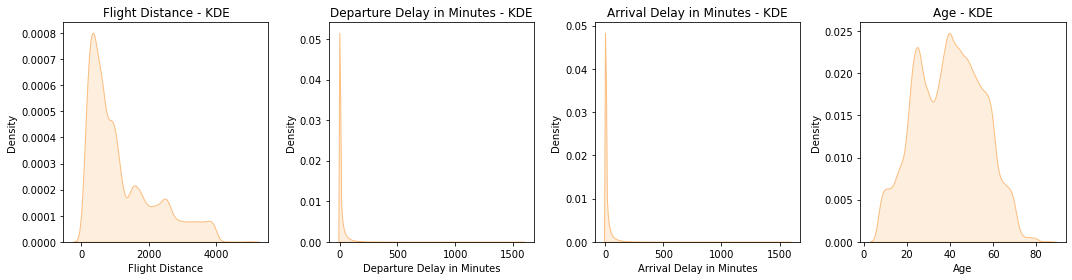

In [9]:
cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',"Age"] #ilgili kolonlar

plt.figure(figsize=(15, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(airline[col], shade=True, color="#fbbd7e")
    plt.title(f"{col} - KDE")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

Dağılım grafikleri, 'Age' kolonunun normale yakın bir dağılıma sahip olduğunu gösterirken; 'Flight Distance', 'Departure Delay in Minutes' ve 'Arrival Delay in Minutes' kolonlarının sağa çarpık (right-skewed) bir dağılım sergilediği gösterir. Bu durum, söz konusu üç değişkende aykırı (outlier) değerlerin bulunabileceğine işaret etmektedir.

'Flight Distance', 'Departure Delay in Minutes' ve 'Arrival Delay in Minutes' değişkenlerinin sağa çarpık (right-skewed) yapısı nedeniyle özellikle yüksek aykırı değerlerin (high outliers) varlığı beklenmektedir. Yine de, kapsamlı bir analiz için düşük aykırı değerleri (low outliers) de göz önünde bulundurarak 1.5-IQR yöntemiyle aykırı değerlerin tespitini yapalım.

In [10]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25) #Q1
    Q3 = data[column].quantile(0.75) #Q3
    IQR = Q3 - Q1
    l_outlier = Q1 - 1.5 * IQR #low outlier
    h_outlier = Q3 + 1.5 * IQR #high outlier
    outliers = data[(data[column] < l_outlier) | (data[column] > h_outlier)]
    return outliers

In [11]:
outlier_dep = outliers(airline, 'Departure Delay in Minutes')
outlier_arr = outliers(airline, 'Arrival Delay in Minutes')
outlier_flight = outliers(airline, 'Flight Distance')
print(len(outlier_dep), len(outlier_arr), len(outlier_flight)) #üç kolon için outlier veri sayılarını yazdıralım

17970 17492 2847


Dağılım grafiğinden açıkça yaptığımız çıkarımı konfirme ettiğimiz üzere 'Departure Delay in Minutes', 'Arrival Delay in Minutes' ve 'Flight Distance' kolonlarında aykırı değerler bulunmakta. Bu aykırı değerleri concat ile birleştirip veri setinin yüzde kaçını oluşturuyor hesaplayalım.

In [12]:
# Outlier verilerini birleştirelim
outliers = pd.concat([outlier_dep, outlier_arr, outlier_flight]).drop_duplicates()
#aykırı değerler total verinin yüzde kaçını oluşturuyor bakalım
percentage_outlier=len(outliers)/total*100;percentage_outlier

17.754850631352017

Yüzde 17.75'lik bir veri, total verinin ciddi bir kısmını kapsıyor, bu veriyi silmek de ciddi bir veri kaybına sebep olur. Ayrıca aykırı değerler hatalı veri mi bir inceleyelim.

Flight Distance kolonuna ait aykırı değerlere bir bakalım, bu aykırı değerler uçuş mesafesi olarak gerçekçi mi değil mi bir bakalım.

Flight Distance değişkenine 1.5 IQR yöntemi uygulanarak belirlenen outlier kümesinde 2847 gözlem yer almaktadır. Bu küme genel olarak 3740–4983 km aralığında, yani oldukça uzun mesafeli uçuşlardan oluşmaktadır ve de mesafe uçuş için olası bir aralıkta. Ortalama uçuş mesafesi 3890 km olup, standart sapma düşüktür. Bu durum, bu aykırı değerlerin veri hatası değil, belirli bir uçuş segmentine karşılık geldiğini göstermektedir. Bu nedenle bu değerler analiz dışına çıkarılmamış, uzun mesafeli uçuşlar olarak ayrıca değerlendirilmiştir.

In [13]:
outlier_flight['Flight Distance'].describe()

count    2847.000000
mean     3890.220934
std       157.995717
min      3740.000000
25%      3805.000000
50%      3872.000000
75%      3938.000000
max      4983.000000
Name: Flight Distance, dtype: float64

/var/folders/0y/0znh0f557yj33dq9g36v30k80000gn/T/ipykernel_90567/2583345304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_flight['AgeGroup'] = pd.cut(outlier_flight['Age'], bins=bins, labels=labels)


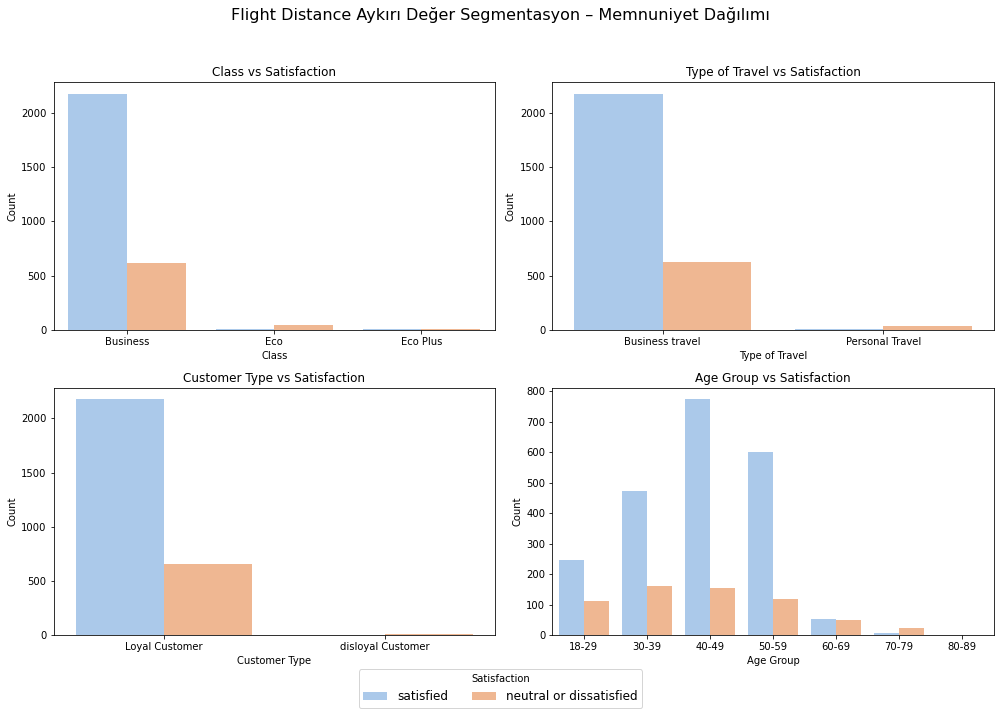

In [23]:
# Yaş grubu segmenti (eğer yoksa)
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
outlier_flight['AgeGroup'] = pd.cut(outlier_flight['Age'], bins=bins, labels=labels)

# Grafik yapısı
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Class vs Satisfaction
sns.countplot(data=outlier_flight, x='Class', hue='satisfaction', palette='pastel', ax=axes[0,0])
axes[0,0].set_title('Class vs Satisfaction')
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Count')
axes[0,0].legend_.remove()

# 2. Type of Travel vs Satisfaction
sns.countplot(data=outlier_flight, x='Type of Travel', hue='satisfaction', palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Type of Travel vs Satisfaction')
axes[0,1].set_xlabel('Type of Travel')
axes[0,1].set_ylabel('Count')
axes[0,1].legend_.remove()

# 3. Customer Type vs Satisfaction
sns.countplot(data=outlier_flight, x='Customer Type', hue='satisfaction', palette='pastel', ax=axes[1,0])
axes[1,0].set_title('Customer Type vs Satisfaction')
axes[1,0].set_xlabel('Customer Type')
axes[1,0].set_ylabel('Count')
axes[1,0].legend_.remove()

# 4. AgeGroup vs Satisfaction
sns.countplot(data=outlier_flight, x='AgeGroup', hue='satisfaction', palette='pastel', ax=axes[1,1])
axes[1,1].set_title('Age Group vs Satisfaction')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Count')
axes[1,1].legend_.remove()

# Ortak legend'i figüre ekle (bir subplot'tan handle al)
handles, labels = axes[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12, title="Satisfaction")

plt.suptitle("Flight Distance Aykırı Değer Segmentasyon – Memnuniyet Dağılımı", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Alt boşluk bırak
plt.show()


Flight Distance Aykırı Gözlemleri – Segmentasyon Analizi: Uçuş mesafesi bakımından aykırı değerlere sahip yolcular incelendiğinde, bu grubun neredeyse tamamının Business sınıfında, iş amaçlı seyahat eden ve sadık müşteri segmentinde yer aldığı görülmektedir. Bu yolcuların memnuniyet oranı oldukça yüksektir. Yaş dağılımı açısından ise ağırlıklı olarak 30–59 yaş arasındaki yolcular bu grubu oluşturmaktadır. Uzak mesafe uçuşlarda hem hizmet kalitesi hem de müşteri profili memnuniyet düzeyini olumlu etkilemiş görünmektedir.

----

Korelasyon matrisine göre Flight Distance değişkeni ile Departure Delay ve Arrival Delay arasında anlamlı bir ilişki bulunmamaktadır (r ≈ -0.03). Bu, uçuş mesafesinin gecikmeler üzerinde belirleyici bir rol oynamadığını göstermektedir.

Öte yandan, Departure Delay ile Arrival Delay arasında çok güçlü bir pozitif korelasyon (r = 0.97) bulunmaktadır. Bu, kalkışta yaşanan gecikmelerin büyük ölçüde varışa da yansıdığını ve genellikle uçuş süresinde telafi edilmediğini göstermektedir.

In [17]:
#aykırı değerlere sahip kolonlar arasında linear bir ilişki var mı korelasyon analizi ile baktık.
outlier_flight[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr() 

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Flight Distance,1.00000,-0.035250,-0.032950
Departure Delay in Minutes,-0.03525,1.000000,0.969608
Arrival Delay in Minutes,-0.03295,0.969608,1.000000


'Arrival Delay in Minutes' kolonu için, outlier kümesinde en yüksek gecikme 26 saat, bu gerçek dışı gibi görünse de, örneğin rötarlı gece uçuşlarında ya da aktarma problemlerinde böyle durumlar yaşanabilir. O yüzden kesin hatalı bir veri diyemediğimiz için analizin dışında bırakmadan devam edelim.
Ancak ortalama ve IQR daha gerçekçi değerlerde yoğunlaşıyor, yani aşırı uç değerler sayıca az ama etkili.
Yüksek standart sapma mevcut, bu aşırı uç değerler yaygın olmadığından, aykırı değerlerin dağılımınının genişliğine işaret ediyor.

In [18]:
outlier_arr['Arrival Delay in Minutes'].describe()

count    17492.000000
mean        85.486165
std         69.705603
min         33.000000
25%         44.000000
50%         62.000000
75%        101.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Departure Delay in Minutes' kolonunun genel istatistiği 'Arrival Delay in Minutes' kolonu ile neredeyse aynı.

In [19]:
outlier_dep['Departure Delay in Minutes'].describe()

count    17970.000000
mean        82.463328
std         68.697701
min         31.000000
25%         42.000000
50%         60.000000
75%         97.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

Arrival Delay in Minutes ve Departure Delay in Minutes değişkenlerinde 1.5-IQR yöntemi ile tespit edilen aykırı değer sayısı sırasıyla 17.492 ve 17.970’tir. Bu değerler, veri setinin önemli bir kısmını oluşturmaktadır. Her iki değişken için de ortalama gecikme süresi yaklaşık 80 dakikadır.

Aykırı değerlerin büyük bölümü 40–100 dakika aralığında yoğunlaşmakta olup, gerçek uçuş senaryolarında karşılaşılabilecek düzeydedir. Ancak az sayıda gözlemde 1000 dakikayı aşan gecikmeler gözlemlenmiştir. Bu gibi ekstrem değerler dikkatle ele alınmalı, ancak veri hatası oldukları kesin olarak belirlenmediği sürece silinmeleri veri kaybına sebep olacaktır.

Ayrıca, Departure Delay ile Arrival Delay arasındaki yüksek korelasyon (r = 0.97), bu verilerin birbirini desteklediğini göstermektedir. Bu nedenle, analizlerde bu outlier gözlemler dışlanmamış, ancak etkilerini gözlemlemek için gerekli segmentasyon analizi yapılmıştır.

/var/folders/0y/0znh0f557yj33dq9g36v30k80000gn/T/ipykernel_90567/3635954529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_arr['AgeGroup'] = pd.cut(outlier_arr['Age'], bins=bins, labels=labels)


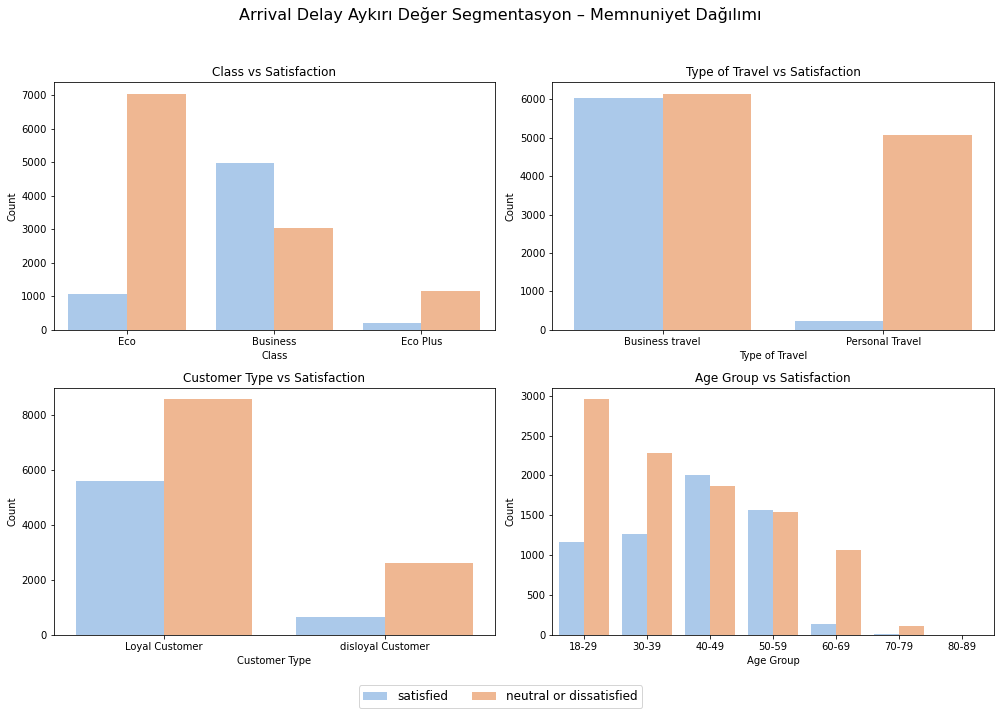

In [22]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
outlier_arr['AgeGroup'] = pd.cut(outlier_arr['Age'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Class vs Satisfaction
sns.countplot(data=outlier_arr, x='Class', hue='satisfaction', palette='pastel', ax=axes[0,0])
axes[0,0].set_title('Class vs Satisfaction')
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Count')
axes[0,0].legend_.remove()

# 2. Type of Travel vs Satisfaction
sns.countplot(data=outlier_arr, x='Type of Travel', hue='satisfaction', palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Type of Travel vs Satisfaction')
axes[0,1].set_xlabel('Type of Travel')
axes[0,1].set_ylabel('Count')
axes[0,1].legend_.remove()

# 3. Customer Type vs Satisfaction
sns.countplot(data=outlier_arr, x='Customer Type', hue='satisfaction', palette='pastel', ax=axes[1,0])
axes[1,0].set_title('Customer Type vs Satisfaction')
axes[1,0].set_xlabel('Customer Type')
axes[1,0].set_ylabel('Count')
axes[1,0].legend_.remove()

# 4. AgeGroup vs Satisfaction
sns.countplot(data=outlier_arr, x='AgeGroup', hue='satisfaction', palette='pastel', ax=axes[1,1])
axes[1,1].set_title('Age Group vs Satisfaction')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Count')
axes[1,1].legend_.remove()

# Ortak legend en alta ekleniyor
handles, labels = axes[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

plt.suptitle("Arrival Delay Aykırı Değer Segmentasyon – Memnuniyet Dağılımı", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # altta legend'e yer bırak
plt.show()

Arrival Delay Aykırı Değer Gözlemleri – Segmentasyon Analizi: Gecikme süresi bakımından aykırı değerlere sahip yolcular segment bazında incelendiğinde, Business sınıfında uçan ve sadık müşteri grubunda yer alan yolcuların memnuniyet düzeylerinin daha yüksek olduğu görülmektedir. Buna karşın, ekonomi sınıfı yolcular, kişisel seyahat edenler ve disloyal müşteriler arasında memnuniyetsizlik oranı daha fazladır. Ayrıca, yaş segmentlerine göre bakıldığında, özellikle 18–29 yaş grubundaki yolcular arasında memnuniyetsizlik oranı belirgin biçimde yüksektir. Bu durum, yaş ve müşteri sadakati gibi demografik ve davranışsal değişkenlerin gecikmeye karşı algıyı etkilediğini göstermektedir.

/var/folders/0y/0znh0f557yj33dq9g36v30k80000gn/T/ipykernel_90567/3145995248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_dep['AgeGroup'] = pd.cut(outlier_dep['Age'], bins=bins, labels=labels)


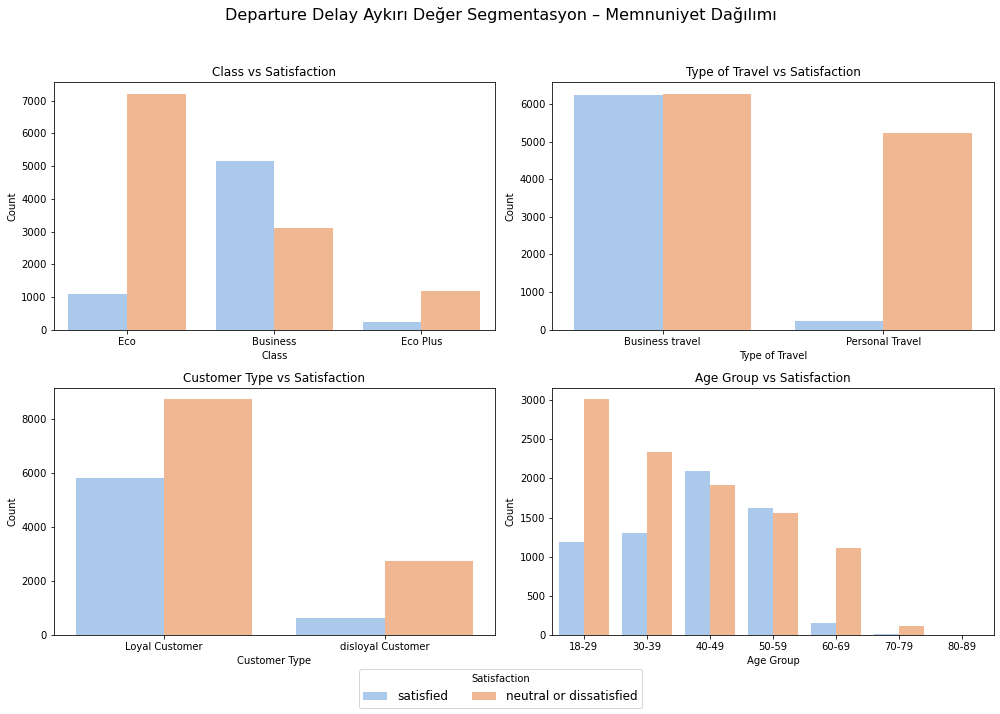

In [25]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
outlier_dep['AgeGroup'] = pd.cut(outlier_dep['Age'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Class vs Satisfaction
sns.countplot(data=outlier_dep, x='Class', hue='satisfaction', palette='pastel', ax=axes[0,0])
axes[0,0].set_title('Class vs Satisfaction')
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Count')
axes[0,0].legend_.remove()

# 2. Type of Travel vs Satisfaction
sns.countplot(data=outlier_dep, x='Type of Travel', hue='satisfaction', palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Type of Travel vs Satisfaction')
axes[0,1].set_xlabel('Type of Travel')
axes[0,1].set_ylabel('Count')
axes[0,1].legend_.remove()

# 3. Customer Type vs Satisfaction
sns.countplot(data=outlier_dep, x='Customer Type', hue='satisfaction', palette='pastel', ax=axes[1,0])
axes[1,0].set_title('Customer Type vs Satisfaction')
axes[1,0].set_xlabel('Customer Type')
axes[1,0].set_ylabel('Count')
axes[1,0].legend_.remove()

# 4. AgeGroup vs Satisfaction
sns.countplot(data=outlier_dep, x='AgeGroup', hue='satisfaction', palette='pastel', ax=axes[1,1])
axes[1,1].set_title('Age Group vs Satisfaction')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Count')
axes[1,1].legend_.remove()

# Ortak legend'i grafiğin altına ekle
handles, labels = axes[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12, title='Satisfaction')

# Başlık ve yerleşim ayarı
plt.suptitle("Departure Delay Aykırı Değer Segmentasyon – Memnuniyet Dağılımı", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Alt boşluk bırak, legend için
plt.show()

Departure Delay Aykırı Değer Gözlemleri – Segmentasyon Analizi: Departure süresi bakımından aykırı değerlere sahip gözlemler incelendiğinde, özellikle ekonomi sınıfında ve disloyal müşteri grubunda memnuniyetsizlik oranının belirgin şekilde yüksek olduğu görülmektedir. Business sınıfı ve sadık müşteriler ise kalkış gecikmelerine rağmen görece daha memnun kalmışlardır. Seyahat amacı açısından ise kişisel seyahat edenlerin, iş amaçlı seyahat edenlere göre gecikmelere daha az tolerans gösterdiği gözlemlenmiştir. Yaş grubu bazında ise genç yolcuların memnuniyetsizlik oranı dikkat çekici derecede fazladır. Bu bulgular, demografik ve davranışsal faktörlerin gecikme algısını etkilediğini göstermektedir.

-----

Şimdi elimizdeki tüm veri üzerinden analizlerimize devam edelim.

In [26]:
airline.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


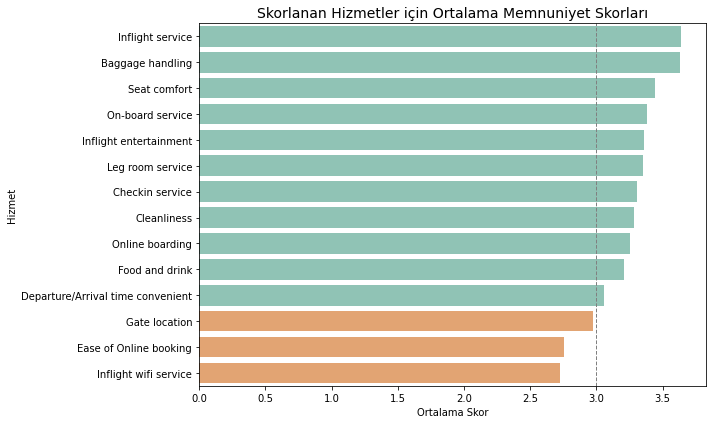

In [27]:
# Memnuniyet puanı içeren sütunlar
score_columns = [
    "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]

# Ortalamaları hesapla
mean_scores = airline[score_columns].mean().sort_values(ascending=False)

# DataFrame haline getir
df_scores = mean_scores.reset_index()
df_scores.columns = ["Feature", "Mean"]

# Renk ayarla (3 ve üzeri yeşil, altı turuncu)
df_scores["Color"] = df_scores["Mean"].apply(lambda x: "#87cbb9" if x >= 3 else "#f4a261")

# Barplot çizimi
plt.figure(figsize=(10, 6))
sns.barplot(data=df_scores, y="Feature", x="Mean", palette=df_scores["Color"])

plt.axvline(3, color='gray', linestyle='--', linewidth=1)

plt.title("Skorlanan Hizmetler için Ortalama Memnuniyet Skorları", fontsize=14)
plt.xlabel("Ortalama Skor")
plt.ylabel("Hizmet")

plt.tight_layout()
plt.show()


-Veri Setine Genel Çıkarımlar;
Yaş dağılımı incelendiğinde, katılımcıların yaşları 7 ile 85 arasında değişmektedir. Ankete katılan müşterilerin yaş ortalaması yaklaşık 39 olarak hesaplanmıştır.

Flight Distance (Uçuş Mesafesi) ortalama 1190 km olup, minimum 31 km, maksimum ise 4983 km olarak ölçülmüştür. Bu da uçuş mesafeleri açısından oldukça geniş bir aralığa işaret etmektedir.

Departure Delay (Kalkış Gecikmesi) süresi ortalama 14.64 dakika, maksimum 1592 dakika ile önemli ölçüde değişkenlik göstermektedir.

Arrival Delay (Varış Gecikmesi) ise ortalama 15 dakika olarak ölçülmüş; maksimum 1584 dakika gecikme ile bu metrik de yüksek varyansa sahiptir.

-Hizmet Bazlı Memnuniyet Değerlendirmesi;

En yüksek memnuniyet ortalama ~3.65 puan ile Inflight Service (Uçuş Sırasındaki Hizmet) alanında gözlemlenmiştir.

Onu hemen takip eden Baggage Handling (Bagaj İşlemleri) hizmeti, ~3.63 ortalama skorla ikinci sırada yer almaktadır.

En düşük memnuniyet oranı, ortalama ~2.72 skorla Inflight Wifi Service’e aittir.

Eğer 3 puanlık skor "ortalama memnuniyet" olarak kabul edilirse, ortalamanın altında kalan hizmetler şunlardır:
Inflight Wifi Service,
Ease of Online Booking (Online Rezervasyon Kolaylığı),
Gate Location (Kapı Konumu)

Bu sonuçlara göre, yolcuların en az memnun olduğu hizmetlerin başında uçuş içi internet hizmeti ve uçuş öncesi bazı kolaylıklar gelmektedir.



-----

-SEGMENTASYON ANALİZİ-

Bu aşamada, müşterileri yaş, cinsiyet ve sadakat programı üyeliği gibi demografik ve davranışsal faktörlere göre segmente ederek memnuniyet düzeylerini analiz edeceğiz. İlk olarak, yaş grupları ve cinsiyet özelinde memnuniyet skorlarının dağılımına bakalım.

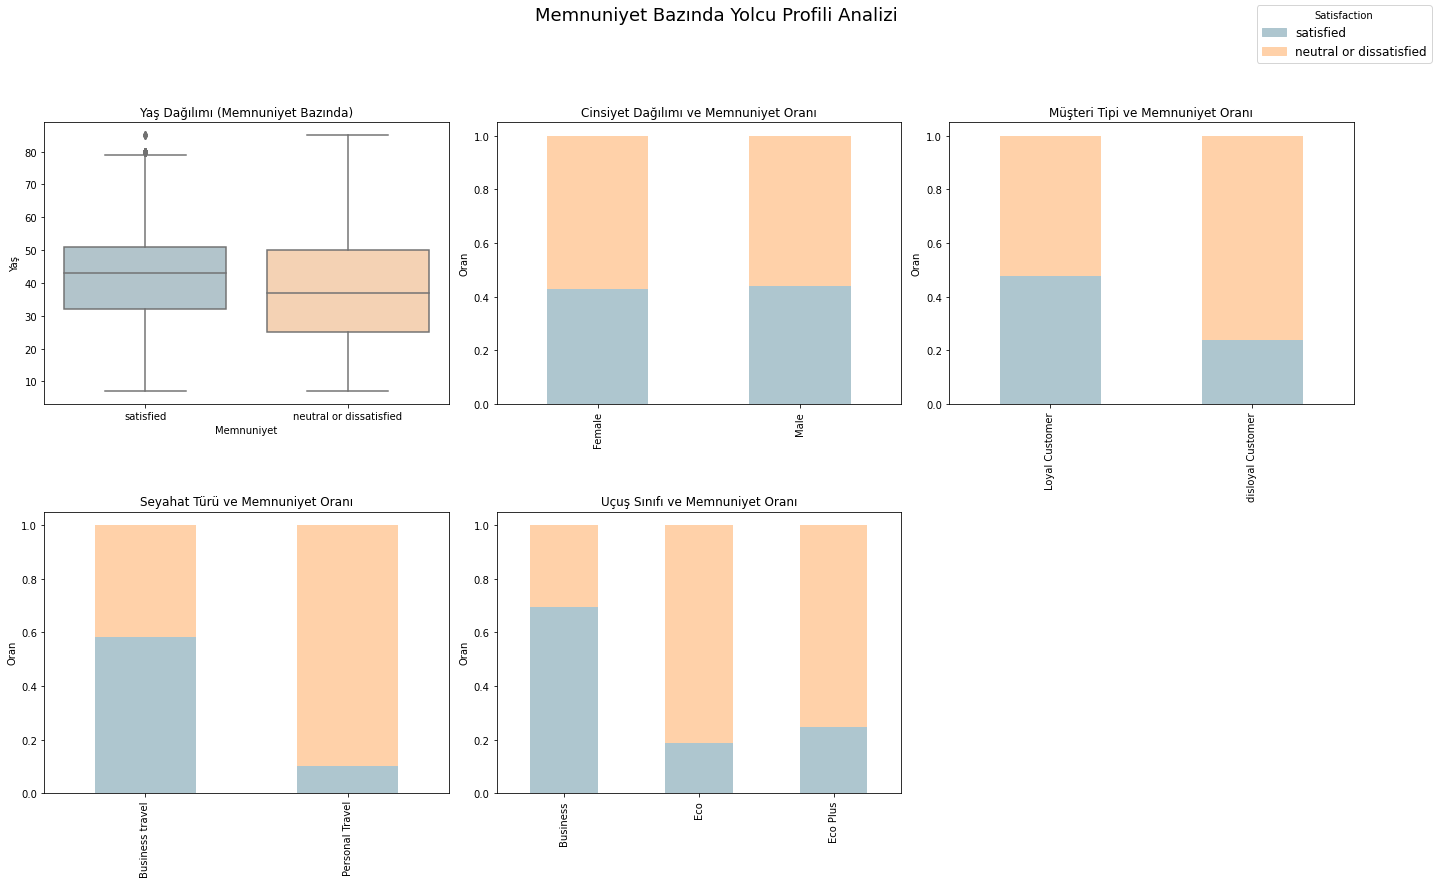

In [28]:
# Pastel renk paleti
palette = ['#aec6cf', '#ffd1a9']  # pastel mavi, pastel turuncu
satisfaction_order = ['satisfied', 'neutral or dissatisfied']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Fonksiyon: stacked bar çizer
def plot_stacked_bar(ax, df_grouped, title):
    df_norm = df_grouped.div(df_grouped.sum(axis=1), axis=0)
    df_norm = df_norm[satisfaction_order]
    df_norm.plot(kind='bar', stacked=True, ax=ax, color=palette, legend=False)
    ax.set_title(title)
    ax.set_ylabel('Oran')
    ax.set_xlabel('')

# 1. Yaş dağılımı (boxplot)
sns.boxplot(
    x='satisfaction',
    y='Age',
    data=airline,
    ax=axes[0,0],
    order=satisfaction_order,
    palette=palette
)
axes[0,0].set_title('Yaş Dağılımı (Memnuniyet Bazında)')
axes[0,0].set_xlabel('Memnuniyet')
axes[0,0].set_ylabel('Yaş')

# 2. Cinsiyet
gender_df = airline.groupby(['Gender', 'satisfaction']).size().unstack(fill_value=0)
plot_stacked_bar(axes[0,1], gender_df, 'Cinsiyet Dağılımı ve Memnuniyet Oranı')

# 3. Müşteri tipi
cust_df = airline.groupby(['Customer Type', 'satisfaction']).size().unstack(fill_value=0)
plot_stacked_bar(axes[0,2], cust_df, 'Müşteri Tipi ve Memnuniyet Oranı')

# 4. Seyahat türü
travel_df = airline.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)
plot_stacked_bar(axes[1,0], travel_df, 'Seyahat Türü ve Memnuniyet Oranı')

# 5. Uçuş sınıfı
class_df = airline.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
plot_stacked_bar(axes[1,1], class_df, 'Uçuş Sınıfı ve Memnuniyet Oranı')

# 6. Boş subplot'u kapat
axes[1,2].axis('off')

# Ortak legend
handles = [plt.Rectangle((0,0),1,1, color=c) for c in palette]
labels = satisfaction_order
fig.legend(handles, labels, loc='upper right', fontsize=12, title='Satisfaction')

# Ana başlık ve düzen
plt.suptitle('Memnuniyet Bazında Yolcu Profili Analizi', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()


--Yaş Dağılımı:

Memnun olan yolcuların yaş ortalaması yaklaşık 42 olup, yaş dağılımları genellikle 32 ile 51 yaş aralığında yoğunlaşmaktadır. Bu durum, memnuniyet düzeyinin özellikle orta yaş gruplarında daha yüksek olduğunu göstermektedir. Buna karşılık, memnun olmayan yolcuların yaş ortalaması daha düşüktür (yaklaşık 37) ve yaşları çoğunlukla 25 ile 50 yaş arasında toplanmaktadır. Bu bulgu, genç ve erken yetişkin yolcuların hizmetlerden daha az memnun kalma eğiliminde olabileceğine işaret etmektedir.

--Cinsiyet Dağılımı:

Cinsiyet bazında memnuniyet karşılaştırıldığında, kadın yolcuların memnuniyet oranı erkek yolculara kıyasla bir miktar daha düşük görünmektedir. Ancak bu fark belirgin düzeyde değildir ve bir çıkarım yaptırmamaktadır.

--Müşteri Sadakati (Customer Type):

Sadık (loyal) müşteriler arasında memnuniyet oranı yaklaşık %47.8 olup, memnun olmayanların oranı %52.2 ile buna oldukça yakındır. Bu durum, sadık müşterilerin bile hizmetten tam olarak memnun kalmadığını göstermektedir.
Buna karşılık, sadık olmayan (disloyal) müşterilerde memnuniyet oranı %24 ile oldukça düşük; memnuniyetsizlik oranı ise %76 gibi yüksek bir seviyededir. Bu fark, müşteri sadakatinin memnuniyetle güçlü bir ilişkisi olduğunu ve sadakat seviyesi azaldıkça memnuniyetsizliğin belirgin şekilde arttığını ortaya koymaktadır.

--Seyahat Amacına Göre Memnuniyet:

Seyahat amacı memnuniyet düzeyini önemli ölçüde etkilemektedir. Business travel (iş amaçlı seyahat) yapan yolcuların %58.4’ü memnun, %41.6’sı memnun değildir. Bu dağılım, iş seyahati yapan yolcuların genel olarak hizmetlerden daha memnun kaldığını göstermektedir.
Buna karşılık, personal travel (kişisel amaçlı seyahat) yapan yolcular arasında memnuniyet oranı yalnızca %10.1 iken, %89.9’u memnun değildir. Bu oldukça çarpıcı fark, kişisel seyahat yapan yolcuların beklentilerinin karşılanmadığını ve hizmet deneyiminden genel olarak daha düşük memnuniyetle ayrıldıklarını ortaya koymaktadır.

--Uçuş Sınıfına Göre Memnuniyet:

Yolcu memnuniyeti, uçulan sınıfa göre belirgin farklılıklar göstermektedir. Business sınıfında uçan yolcuların %69.4’ü memnun, sadece %30.6’sı memnun değildir. Bu yüksek memnuniyet oranı, Business sınıfının sunduğu hizmet kalitesinin yolcu beklentilerini büyük ölçüde karşıladığını göstermektedir.
Diğer yandan, Economi sınıfında memnuniyet oranı yalnızca %18.8, memnuniyetsizlik oranı ise %81.2’dir. Bu, ekonomik sınıf yolcularının büyük çoğunluğunun hizmetlerden tatmin olmadığını ortaya koymaktadır.
Eco Plus sınıfı, Economi’ye göre biraz daha iyi bir performans gösterse de, memnuniyet oranı sadece %24.6, memnun olmayanların oranı ise %75.4 seviyesindedir.
Bu dağılım, sınıf yükseldikçe yolcu memnuniyetinin anlamlı şekilde arttığını ve özellikle Economi sınıfta hizmet kalitesiyle ilgili ciddi bir iyileştirme ihtiyacı olduğunu göstermektedir.

Flight Distance da yolculukta önemli bir parametre. Memnuniyete etkisi hakkında genel bir fikir sahibi olmak gerekirse; aşağıdaki grafikte görüldüğü üzere yolculuk uzunluğu arttıkça, yolculardaki memnuniyet oranı artmış gözüküyor.

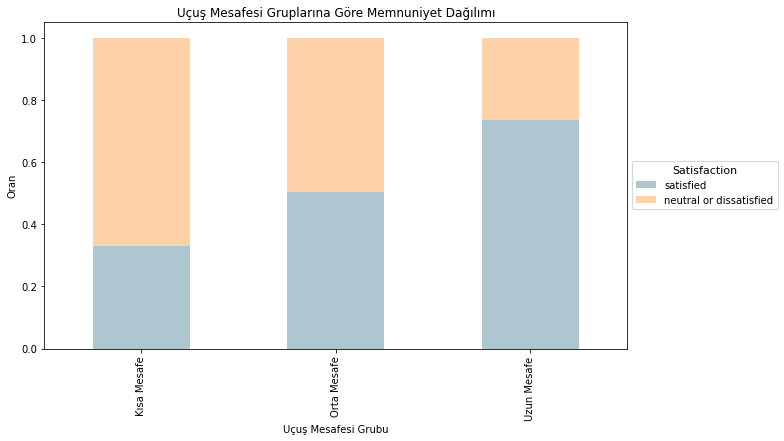

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
distance_df_norm[satisfaction_order].plot(kind='bar', stacked=True, color=pastel_palette, ax=ax)

ax.set_title('Uçuş Mesafesi Gruplarına Göre Memnuniyet Dağılımı')
ax.set_ylabel('Oran')
ax.set_xlabel('Uçuş Mesafesi Grubu')

fig.subplots_adjust(right=0.8)  # Sağda boşluk bırak
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Satisfaction', fontsize=10, title_fontsize=11)

plt.show()

-Segmentasyon Analizine Flight Distance'ı Dahil Edelim ve en memnuniyetsiz olan grup profiline karar verelim-

In [34]:
# 1. Memnun olmayanları filtrele
dissatisfied = airline[airline['satisfaction'] == 'neutral or dissatisfied'].copy()

# 2. Flight distance'ı kategorik hale getir
dissatisfied['FlightDistanceGroup'] = pd.cut(
    dissatisfied['Flight Distance'],
    bins=[0, 1000, 2500, memnun_degil['Flight Distance'].max()],
    labels=['Kısa', 'Orta', 'Uzun']
)

# 3. Grup sayısı ve oranları
combination = (
    dissatisfied.groupby(['FlightDistanceGroup', 'Class', 'Customer Type', 'Type of Travel']).size().reset_index(name='Count')
)

# 4. Yüzde hesapla
total = combination['Count'].sum()
combination['Percent'] = (combination['Count'] / total * 100).round(2)

# 5. Sırala
combination_sorted = combination.sort_values(by='Percent', ascending=False).reset_index(drop=True)

# 6. İlk 10 satırı göster
combination_sorted.head(10)

,FlightDistanceGroup,Class,Customer Type,Type of Travel,Count,Percent
0,Kısa,Eco,Loyal Customer,Personal Travel,21680,29.61
1,Kısa,Eco,disloyal Customer,Business travel,9183,12.54
2,Orta,Eco,Loyal Customer,Personal Travel,7179,9.80
3,Kısa,Eco,Loyal Customer,Business travel,4688,6.40
4,Kısa,Business,disloyal Customer,Business travel,4059,5.54
5,Orta,Business,Loyal Customer,Business travel,4021,5.49
6,Uzun,Business,Loyal Customer,Business travel,3622,4.95
7,Kısa,Business,Loyal Customer,Business travel,3403,4.65
8,Kısa,Eco Plus,Loyal Customer,Personal Travel,3040,4.15
9,Orta,Eco,disloyal Customer,Business travel,2233,3.05


Memnun olmayan yolcuların büyük çoğunluğu, kısa mesafe uçuşlarında economi sınıfında seyahat eden yolculardan oluşmaktadır. Özellikle kişisel seyahat gerçekleştiren sadık müşterilerin memnun olmaması dikkat çekicidir.
Bu durum, kısa mesafeli uçuşlarda sunulan hizmet kalitesinin ve müşteri beklentilerinin uyumsuz olabileceğini düşündürmektedir.
Ayrıca, sadık olmayan müşterilerin iş seyahatlerinde yaşadığı memnuniyetsizlik, önemli bir riske ve noktaya işaret etmektedir.
Yukarıdaki bulguları görselleştirelim;

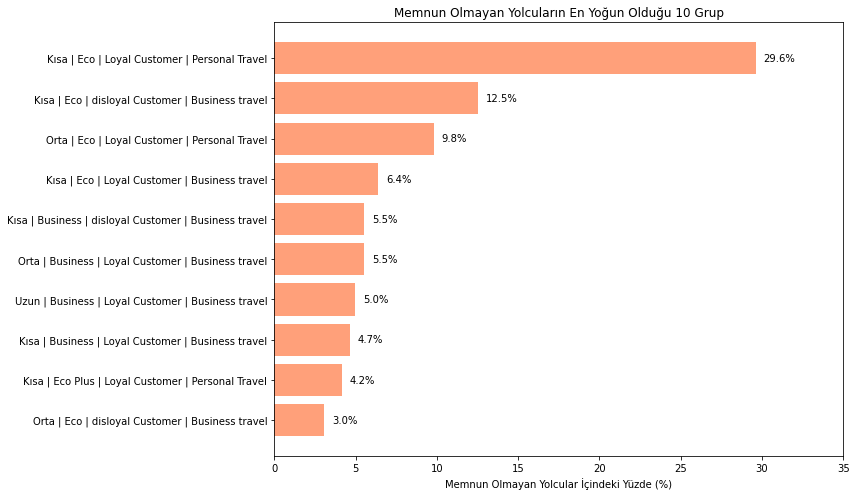

In [39]:
# Sadece ilk 10 grup
top10 = combination_sorted.head(10).copy()

# Grup adlarını birleştir
top10['Grup'] = top10['FlightDistanceGroup'].astype(str) + ' | ' + \
                top10['Class'].astype(str) + ' | ' + \
                top10['Customer Type'].astype(str) + ' | ' + \
                top10['Type of Travel'].astype(str)

# Grafik
plt.figure(figsize=(12, 7))
pastel_salmon = '#FFA07A'  # Pastel salmon rengi
bars = plt.barh(top10['Grup'], top10['Percent'], color=pastel_salmon)
plt.xlabel('Memnun Olmayan Yolcular İçindeki Yüzde (%)')
plt.title('Memnun Olmayan Yolcuların En Yoğun Olduğu 10 Grup')

# Yüzde etiketleri
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center')

plt.xlim(0, 35)  # Barların sağa taşmasını önler
plt.gca().invert_yaxis()  # En büyük bar en üstte olacak şekilde sırala
plt.tight_layout()
plt.show()

-Memnuniyetsizlikte Öne Çıkan Yolcu Profilleri

Yolcu memnuniyet analizinde, memnun olmayanların büyük çoğunluğunun belirli yolcu profillerinde yoğunlaştığı görülmüştür. Özellikle:

Kısa mesafeli uçuşlarda, ekonomi sınıfında, kişisel seyahat gerçekleştiren sadık müşteriler (%29.6) memnun olmayan yolcuların açık ara en büyük grubunu oluşturmaktadır.
Bu durum, sadık müşterilerin dahi kısa uçuşlarda beklentilerinin karşılanmadığını ve bu segmentin hizmet kalitesine daha duyarlı olduğunu göstermektedir.

İkinci sırada, kısa mesafe + ekonomi sınıf + disloyal müşteri + business travel (%12.5) yer almakta. Bu grup iş amaçlı uçan ancak havayoluna sadakati olmayan müşterilerden oluşuyor. Muhtemelen işveren kaynaklı uçuş tercihi yapamayan bu grup, düşük hizmet kalitesi karşısında daha memnuniyetsiz kalmakta.

Üçüncü sırada yine orta mesafe + ekonomi sınıf + loyal + personal travel (%9.8) grubu yer almakta. Bu durum, ekonomi sınıf ve kişisel seyahat kombinasyonunun, sadakat düzeyi ne olursa olsun memnuniyet üzerinde olumsuz etkisi olabileceğini düşündürmektedir.

Genel olarak tabloya bakıldığında:
Kısa mesafeli uçuşlar listenin ilk 10 sırasının 6’sında yer almakta.
Ekonomi sınıf açık ara en fazla memnuniyetsizlik yaşanan kabin sınıfı.
Loyal müşteriler listede sıklıkla yer alıyor, bu da sadakat seviyesine bakmadan hizmet kalitesine odaklanması gerektiğini gösteriyor.
Business sınıfında dahi memnuniyetsizlik görülüyor; bu özellikle kısa mesafeli business uçuşlarında dikkat çekici.

-ROOT CAUSE ANALYSIS-

Değerlendirilen hizmetlerin memnuniyete etkisini araştırarak memnuniyetsizlikteki temel faktörleri araştıralım.
Segmentasyon analizinde en memnuniyetsiz profil olarak belirlediğimiz Kısa mesafeli uçuşlarda, Ekonomi sınıfında, kişisel seyahat gerçekleştiren sadık müşteriler 3'ün altında hangi hizmetlere ne sıklıkla oy vermiş bir bakalım.

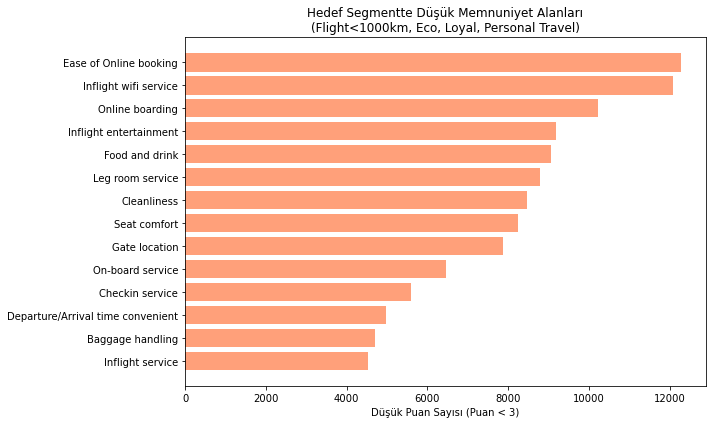

In [41]:
target_group = airline[
    (airline['Flight Distance'] < 1000) &
    (airline['Class'] == 'Eco') &
    (airline['Customer Type'] == 'Loyal Customer') &
    (airline['Type of Travel'] == 'Personal Travel')
]

satisfaction_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

low_scores = {}

for col in satisfaction_cols:
    low_score_count = (target_group[col] < 3).sum()
    low_scores[col] = low_score_count
    
# Sıralayarak barplot
sorted_low_scores = dict(sorted(low_scores.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10,6))
pastel_salmon = '#FFA07A'  # Pastel ton
plt.barh(list(sorted_low_scores.keys()), list(sorted_low_scores.values()), color=pastel_salmon)
plt.xlabel('Düşük Puan Sayısı (Puan < 3)')
plt.title('Hedef Segmentte Düşük Memnuniyet Alanları\n(Flight<1000km, Eco, Loyal, Personal Travel)')
plt.gca().invert_yaxis()  # En yüksek yukarıda olsun
plt.tight_layout()
plt.show()

Hedef segment olan kısa mesafe uçan (<1000 km), ekonomi sınıfında seyahat eden, sadık (loyal) ve kişisel amaçlı seyahat eden yolcular arasında yapılan analizde, hizmet kategorilerinde 3 puan altı memnuniyet skorlarının en yoğun olduğu alanlar belirlenmiştir.

Grafik bulgularına göre, bu müşteri grubunda en fazla düşük puan alan 8000 üstü frekansa sahip hizmet kategorileri:

Ease of Online Booking
Inflight Wifi Service
Online Boarding
Inflight Entertainment
Food and Drink
Leg Room Service
Cleanliness
Seat Comfort
Gate Location


şeklinde sıralanmıştır.

Bu durum, özellikle dijital temas noktalarında (rezervasyon, internet, eğlence ve boarding işlemleri) yaşanan deneyim sorunlarının, memnuniyetsizlikte başlıca noktalardan olduğunu göstermektedir.


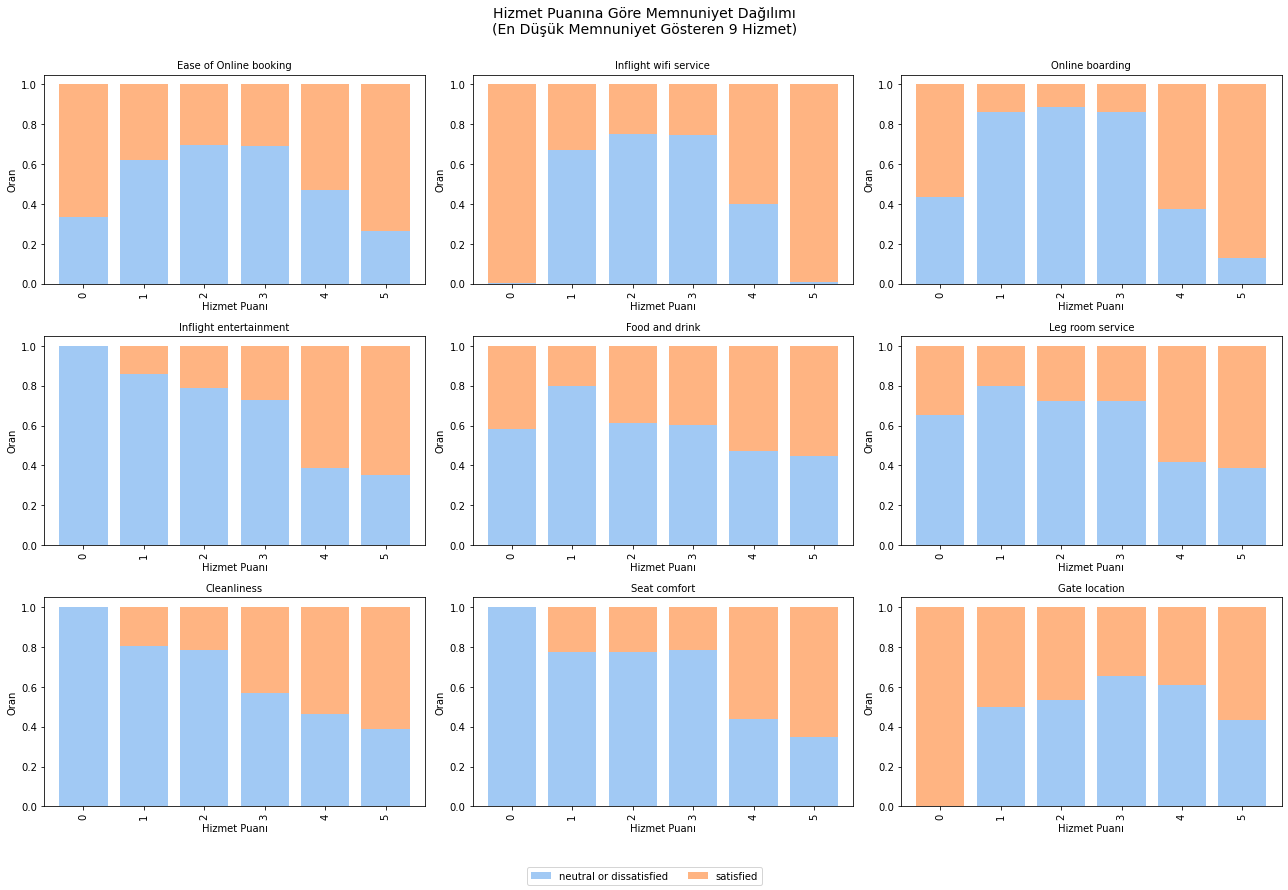

In [42]:
# Stil olarak pastel renk paletini kullan
pastel_colors = sns.color_palette("pastel")

# İlk 9 hizmet kolonu
cols_to_plot = [
    'Ease of Online booking', 'Inflight wifi service', 'Online boarding',
    'Inflight entertainment', 'Food and drink', 'Leg room service',
    'Cleanliness', 'Seat comfort', 'Gate location'
]

# Subplot oluştur
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Her subplot için grafik çiz
for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    temp = airline.groupby(col)['satisfaction'].value_counts(normalize=True).unstack()
    temp = temp.reindex(sorted(temp.index))  # skorları sıraya koymak için
    temp.plot(kind='bar', stacked=True, ax=ax, color=pastel_colors, width=0.8, legend=False)
    
    ax.set_title(f"{col}", fontsize=10)
    ax.set_ylabel("Oran")
    ax.set_xlabel("Hizmet Puanı")

# Ortak legend en alt orta konuma yerleştirilir
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.suptitle("Hizmet Puanına Göre Memnuniyet Dağılımı\n(En Düşük Memnuniyet Gösteren 9 Hizmet)", fontsize=14, y=1.02)
plt.show()

Yapılan analizde, daha önce belirlenen memnuniyetsiz yolcu segmenti (kısa mesafe uçan, ekonomi sınıfı, sadık ve kişisel seyahat edenler) özelinde, memnuniyet seviyelerinin hizmet skorlarına göre nasıl değiştiği incelenmiştir.

Yukarıda yer alan grafiklerde her bir hizmet kalemi için, 0-5 arasında verilen skorların yolcu memnuniyetiyle (satisfied vs. neutral/dissatisfied) nasıl ilişkilendiği gösterilmiştir.

Genel Eğilim:
Çoğu hizmette skor arttıkça memnuniyet de artma eğilimindedir. Özellikle 0–2 skorlarında memnuniyetsizlik oranı çok yüksek, 4–5 skorlarında ise memnuniyet oranı baskındır.

Bazı Hizmetlerde Doğrusal ve Güçlü Bir Etki Mevcuttur:

Cleanliness

Seat Comfort

Inflight Entertainment

Bu üç alanda hizmet skoru yükseldikçe memnuniyet oranı doğrudan ve belirgin şekilde artmakta, düşük skorlar ise neredeyse tamamen memnuniyetsizlik ile sonuçlanmaktadır.
Bu durum, bu hizmetlerin müşteri memnuniyeti üzerinde güçlü bir belirleyici olduğunu göstermektedir.

Dijital Hizmetler (örn. Online Booking, Wifi, Boarding):
Benzer şekilde bu hizmetlerde de skor yükseldikçe memnuniyet artmaktadır; ancak geçişler bazı skor aralıklarında daha dalgalıdır. Bu da hizmetin kararlılığı veya müşterinin hizmeti algılamasındaki tutarsızlıkla ilişkili olabilir.

Orta Skorlar (3) Bazen Kararsızlık Göstergesi:
Özellikle fiziksel hizmetlerde 3 puan alan yolcuların memnuniyet dağılımı daha dengeli kalmıştır. Bu durum 3 puanın genellikle kararsız veya ortalama deneyim anlamına geldiğini düşündürmektedir.


